# Non-linear regression with PyTorch

This example shows fitting of a PyTorch neural network to a non-linear pattern of data. To keep the example simple, we do not use train/test splits, or use of mini-batches of data for fitting.

We use a single X feature, but the same method would work where there are multiple X features.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

## Create non-linear data (a sine wave with added noise)

In [2]:
X = np.linspace(1,17,1000).reshape(-1,1)
y = np.sin(X) * 50
error = np.random.randint(-10, 10, (1000,1))
y += error

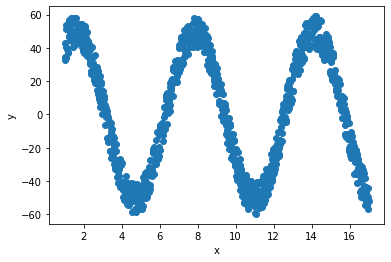

In [3]:
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Define model

The model has four fully connected layers:

* An input layer (single neuron)
* Two hidden layers
* An output layer

Each layer, apart form the output layers, is processed through ReLU activation.

In [4]:
class Model(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        
        # Use super __init__ to inherit from parent nn.Module class
        super(Model, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.fc2 = nn.Linear(hidden_features, hidden_features)
        self.fc3 = nn.Linear(hidden_features, hidden_features)
        self.fc4 = nn.Linear(hidden_features, out_features)
                
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x) # ReLU activation
        x = self.fc2(x)
        x = F.relu(x) # ReLU activation
        x = self.fc3(x)
        x = F.relu(x) # ReLU activation
        x = self.fc4(x)
        
        return x

In [5]:
model = Model(1, 200, 1)
print(model)

Model(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=1, bias=True)
)


## Set loss function and optimizer

In [6]:
# Use Mean Squared Error loss for regression
criterion = nn.MSELoss()

# Adam is a good general purpose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

## Train the model

In [7]:
# Convert X and y to tensors
Xt = torch.Tensor(X)
yt = torch.Tensor(y)

# Define number of training epochs (passes over the training data)
epochs = 1000

# Set up list to hold model loss with each epoch
losses = []

# Loop through epochs
for i in range(epochs):
    i+=1
    # Reset model gradients
    optimizer.zero_grad()
    # Predict y (as a single batch)
    y_pred = model.forward(Xt)
    # Calculate loss
    loss = criterion(y_pred, yt)
    # Backpropagate loss
    loss.backward()
    # Update network weights
    optimizer.step()
    # Record loss
    losses.append(loss)

## Show model loss over training epochs

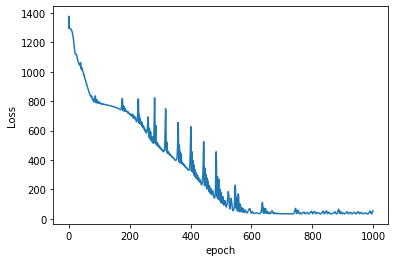

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Show neural net fit to data

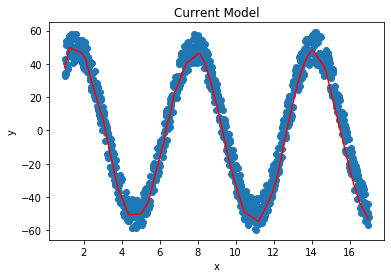

In [9]:
plt.scatter(X, y)
plt.plot(X,y_pred.detach().numpy(), color='r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')
plt.show()